In [0]:
#importing all the necessary modules and preparing data
import torch
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5], [0.5]),
                               ])
trainset = datasets.MNIST("C:/Users/dEnOmInAtOr/.pytorch/MNIST_data", download=True, train=True, transform=transform)
testset = datasets.MNIST("C:/Users/dEnOmInAtOr/.pytorch/MNIST_data", download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64)

In [9]:
print(torch.cuda.is_available())

True


In [10]:
#data dimensions for one pass
images, labels = next(iter(trainloader))
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [0]:
#setting up
from torch import nn
import torch.nn.functional as F
from torch import optim

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        #flattened tensor
        x = x.view(x.shape[0], -1)
        #input layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        #output layer
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

    
model = Network()
model.to(device)
    
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [16]:
epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                
                images, labels = images.to(device), labels.to(device)
                
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.466..  Test Loss: 0.192..  Test Accuracy: 0.942
Epoch: 2/30..  Training Loss: 0.287..  Test Loss: 0.180..  Test Accuracy: 0.943
Epoch: 3/30..  Training Loss: 0.246..  Test Loss: 0.135..  Test Accuracy: 0.961
Epoch: 4/30..  Training Loss: 0.231..  Test Loss: 0.117..  Test Accuracy: 0.967
Epoch: 5/30..  Training Loss: 0.222..  Test Loss: 0.118..  Test Accuracy: 0.963
Epoch: 6/30..  Training Loss: 0.211..  Test Loss: 0.121..  Test Accuracy: 0.964
Epoch: 7/30..  Training Loss: 0.204..  Test Loss: 0.105..  Test Accuracy: 0.969
Epoch: 8/30..  Training Loss: 0.201..  Test Loss: 0.106..  Test Accuracy: 0.970
Epoch: 9/30..  Training Loss: 0.196..  Test Loss: 0.126..  Test Accuracy: 0.965
Epoch: 10/30..  Training Loss: 0.193..  Test Loss: 0.114..  Test Accuracy: 0.967
Epoch: 11/30..  Training Loss: 0.186..  Test Loss: 0.113..  Test Accuracy: 0.968
Epoch: 12/30..  Training Loss: 0.181..  Test Loss: 0.094..  Test Accuracy: 0.972
Epoch: 13/30..  Training Loss: 0.186.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

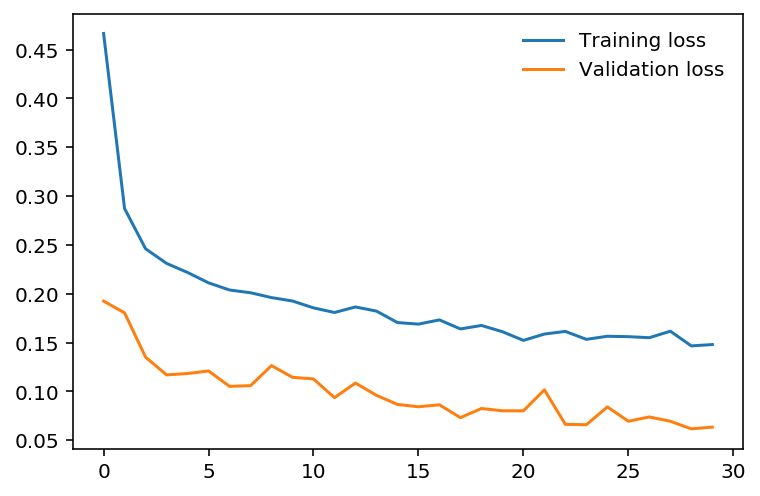

In [18]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)